<a href="https://colab.research.google.com/github/deshanchathusanka/optimisation/blob/main/optimizer_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. $\color{Blue}{\text{Installations}}$

In [153]:
import numpy as np
import doctest
import math
import time
import matplotlib.pyplot as plt

from scipy.stats import truncnorm

# 2. $\color{Blue}{\text{Function Definitions}}$

## 2.1 $\color{Blue}{\text{Function Counter Decorator}}$

In [154]:
def count(fn):
  '''
  This is a decorator function to count number of function executions
  fn : function
  '''
  def decorated_fn(*args, **kwargs):
    decorated_fn.execution += 1
    return fn(*args, **kwargs)
  decorated_fn.execution = 0
  return decorated_fn

## 2.2 $\color{Blue}{\text{Implementations of Equations}}$

### 2.2.1 $
\color{Red}{
f(x) = 1.10471 x1^2 x2 + 0.04811x3x4(14.0 + x2)
}
$

In [155]:
@count # f = count(f)
def f(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  f_x = 1.10471*x1*x1*x2 + 0.04811*x3*x4*(14.0 + x2)
  return f_x

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
f(x_np)
f(x_np)
print(f'Number of executions = {f.execution}')


########## Testing execution count ############

Number of executions = 2


### 2.2.2 ${\color{Blue}{
\tau' = \frac{6000}{\sqrt{2}x1x2}
}}$

In [156]:
@count # t1 = count(t1)
def t1(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _t1 = 6000/(math.sqrt(2)*x1*x2)
  return _t1

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t1(x_np)
t1(x_np)
print(f'Number of executions = {t1.execution}')

assert round(t1(x_np), 2) == 2121.32


########## Testing execution count ############

Number of executions = 2


### 2.2.3 $
\color{Blue}{
\tau'' = \frac{6000(14+0.5x_2)\sqrt{0.25(x_2^2+(x_1+x_3)^2)}}{2(0.707x_1x_2(\frac{x_2^2}{12}+0.25(x_1+x_3)^2))}
}
$

In [157]:
@count # t2 = count(t2)
def t2(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  numerator = 6000*(14 + 0.5*x2)*math.sqrt(0.25*(x2**2 + (x1+x3)**2))
  denominator = 2*(0.707*x1*x2*(((x2**2)/12) + 0.25*((x1+x3)**2))) 

  if denominator == 0 :
    raise RuntimeWarning("Error")

  _t2 = numerator/denominator
  return _t2

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t2(x_np)
t2(x_np)
t2(x_np)
print(f'Number of executions = {t2.execution}')

assert round(t2(x_np)) == 16422.00


########## Testing execution count ############

Number of executions = 3


### 2.2.4 $
\color{Blue}{
\tau = \sqrt{(\tau'^2+\tau''^2) + \frac{x_2\tau'\tau''}{\sqrt{0.25(x_2^2 + (x_1 + x_3)^2)}}}
}$

In [158]:
@count
def t(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _t1 = t1(x_np)
  _t2 = t2(x_np)
  _t = math.sqrt((_t1**2 + _t2**2) 
  + ((x2*_t1*_t2)/math.sqrt(0.25*(x2**2 + (x1 + x3)**2))))

  return _t

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t(x_np)
t(x_np)
t(x_np)
print(f'Number of executions = {t.execution}')

_t = t(x_np)
assert round(_t, 2) == 17474.00, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.5 $\color{Blue}{
  \sigma = \frac{504000}{x_3^2x_4}
}$

In [159]:
@count
def sigmaf(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _sigma = 504000/((x3**2)*x4)

  return _sigma

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
sigmaf(x_np)
sigmaf(x_np)
sigmaf(x_np)
print(f'Number of executions = {sigmaf.execution}')

assert round(sigmaf(x_np)) == 14000, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.6 $\color{Blue}{
  p = 64746.022(1 - 0.0282346x_3)x_3x_4^3
}$

In [160]:
@count
def p(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _p = 64746.022*(1 - 0.0282346*x3)*x3*(x4**3)

  return _p

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
p(x_np)
p(x_np)
p(x_np)
print(f'Number of executions = {p.execution}')

assert round(p(x_np), 2) == 11378263.28, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.7 $\color{Red}{
  g_1(x) = 13600 - \tau(x)
}
$

In [161]:
@count
def g1(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  _t = t(x_np)
  _g1 = 13600 - _t

  return _g1

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g1(x_np)
g1(x_np)
g1(x_np)
print(f'Number of executions = {g1.execution}')

assert round(g1(x_np), 2) == -3874, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [162]:
@count
def g2(x_np):
  _sigma = sigmaf(x_np)
  _g2 = 30000 - _sigma

  return _g2


########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g2(x_np)
g2(x_np)
g2(x_np)
print(f'Number of executions = {g2.execution}')

assert round(g2(x_np), 2) == 16000, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [163]:
@count
def g3(x_np):
  [x1, x2, x3, x4] = x_np
  _g3 = x4 - x1
  return _g3

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g3(x_np)
g3(x_np)
g3(x_np)
print(f'Number of executions = {g3.execution}')

assert round(g3(x_np)) == 3, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [164]:
@count
def g4(x_np):
  _p = p(x_np)
  _g4 = _p - 6000

  return _g4

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g4(x_np)
g4(x_np)
g4(x_np)
print(f'Number of executions = {g4.execution}')

assert round(g4(x_np), 2) == 11372263.28, 'functional issue'


########## Testing execution count ############

Number of executions = 3


# 3 $\color{Blue}{\text{Constraints}}
$



1. $\color{Red}{g_1(x), g_2(x), g_3(x), g_4(x) \ge 0}$
2. $\color{Red}{x_1,x_2 \in [0.125, 5]}$
3. $\color{Red}{x_3, x_4 \in [0.1, 10]}$



In [165]:
def pi_static(x_np, r, beta):
  _pi_static = f(x_np) + r*abs((min(0, g1(x_np))**beta)) + r*abs((min(0, g2(x_np))**beta)) + r*abs((min(0, g3(x_np))**beta)) + r*abs((min(0, g4(x_np))**beta))
  return _pi_static

########### unit testing #############
x_np = [2, 4, 5, 7]
print(pi_static(x_np, 30, 2))

47.98466


# 4. $\color{Blue}{
  \text{Random Search}
}
$

In [166]:
def random_search(no_samples, lb, ub):
  '''
  no_samples = Number of samples
  Description = Implementation of Random Search
  '''
  ############### generate samples ##############
  x_np_candidates = np.random.uniform(low = lb, high = ub, size = (no_samples, 4))

  ################ execute random search with selected candidates ###############
  # f_values = [f(x_np) for x_np in x_np_candidates]
  f_values = [pi_static(x_np, 20, 1) for x_np in x_np_candidates]
  f_min_index = np.argmin(f_values)
  x_np_min = x_np_candidates[f_min_index]
  f_min = f_values[f_min_index]
  return x_np_min, f_min

start = time.perf_counter()
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
[x_np_min, f_min] = random_search(n_samples, lb, ub) 
end = time.perf_counter()

print(f'Optimal Value : {x_np_min}')
print(f'Minimum Function Value : {f_min}')
print(f'Execution Time : {round((end - start)*1000, 2)}ms')
# print(f'Number of executions (g1(x))= {g1.execution}')

Optimal Value : [0.71341677 1.60844441 8.34477662 0.85798197]
Minimum Function Value : 6.280713221567699
Execution Time : 28.41ms


In [210]:
n_repeat = 21
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
start = time.perf_counter()
random_search_repeat_results = np.array([random_search(n_samples, lb, ub) for i in range(n_repeat)])
end = time.perf_counter()

min_cost_param_index = np.argmin(random_search_repeat_results[:, -1])
min_cost_param = random_search_repeat_results[min_cost_param_index][0]
min_cost = random_search_repeat_results[min_cost_param_index][1]
print(f'Execution Time : {round((end - start)*1000, 2)}ms')
print(f'Minimum Cost : {min_cost}')
print(f'Minimum Cost Param : {min_cost_param}')

assert len(random_search_repeat_results) == 21
# assert g1.execution < 10000, f'g1(x) has been executed more than allowed: {g1.execution}'

Execution Time : 550.44ms
Minimum Cost : 3.0527521163216376
Minimum Cost Param : [0.3023165  4.73729954 8.16294639 0.34986062]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


In [211]:
assert g1(min_cost_param)>0
assert g2(min_cost_param)>0
assert g3(min_cost_param)>0
assert g4(min_cost_param)>0

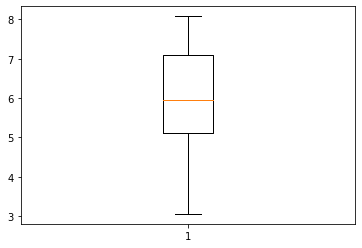

In [212]:
plt.figure()
plt.boxplot(random_search_repeat_results[:, -1])
plt.show()

# 5. $\color{Blue}{
  \text{Simulated Annealing}
}
$

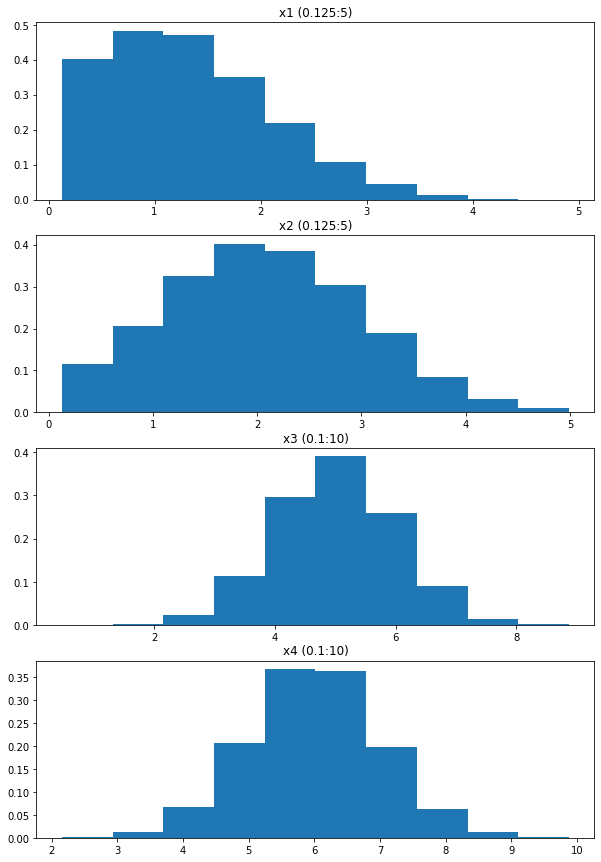

In [170]:
def generate_truncate_rvs(lb, ub, mu, sigma, n_samples = 1):
  '''
  lb : lower bound
  up : upper bound
  mu : mean
  sigma : standard deviation
  n_samples : number of samples
  '''
  a = (lb - mu)/sigma
  b = (ub - mu)/sigma
  d = len(a)

  r_normalised = truncnorm.rvs(a, b, size = (n_samples, d))
  r_scaled = (r_normalised * sigma) + mu
  return r_scaled


#################### unit testing #################
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
mu = np.array([1, 2, 5, 6])
sigma = np.array([1, 1, 1, 1])
n_samples = 20000
truncated_rvs = generate_truncate_rvs(lb, ub, mu, sigma, n_samples)

plt.figure(figsize = (10, 15))
ax = plt.subplot(4, 1, 1)
ax.set_title('x1 (0.125:5)')
ax.hist(truncated_rvs[:, 0], density = True)

ax = plt.subplot(4, 1, 2)
ax.set_title('x2 (0.125:5)')
ax.hist(truncated_rvs[:, 1], density = True)

ax = plt.subplot(4, 1, 3)
ax.set_title('x3 (0.1:10)')
ax.hist(truncated_rvs[:, 2], density = True)

ax = plt.subplot(4, 1, 4)
ax.set_title('x4 (0.1:10)')
ax.hist(truncated_rvs[:, 3], density = True)
plt.show()


In [216]:
def simulated_annealing(n_samples, lb, ub):
  '''
  no_samples : Number of samples
  Description : Implementation of simulated annealing
  '''
  sigma = np.array([1, 1, 1, 1])

  x_best = np.random.uniform(low = lb, high = ub)
  # y_best = f(x_best)
  y_best = pi_static(x_best, 30, 2)

  x_c = x_best
  y_c = y_best

  t_i = 100 # initial temperature
  for k in range(n_samples):
    t_k = t_i/(k + 1) # fast annealing model
    x_prime = generate_truncate_rvs(lb, ub, x_c, sigma)
    x_prime = np.transpose(x_prime[0])
    y_prime = f(x_prime)
    y_prime = pi_static(x_prime, 30, 2)
    delta_y = y_prime - y_c

    p = min(np.exp(-delta_y/t_k), 1)
    p_accepted = np.random.uniform(0, 1, 1)
    if(delta_y <= 0) or (p_accepted < p): # exploitation and exploration
      x_c, y_c = x_prime, y_prime

    if(y_prime < y_best):
      x_best, y_best = x_prime, y_prime
      

  return x_best, y_best

n_samples = 1000
lb, ub = [0.125, 0.125, 0.1, 0.1], [5, 5, 10, 10]
start = time.perf_counter()
simulated_annealing(n_samples, lb, ub)
[x_np_min, f_min] = simulated_annealing(n_samples, lb, ub)
end = time.perf_counter()

print(f'Optimal value : {x_np_min}')
print(f'Execution Time : {end} - {start}')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


Optimal value : [0.32532977 4.74071723 8.72936263 0.26250542]
Execution Time : 9887.829804275 - 9886.601602592


In [217]:
n_repeat = 21
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
start = time.perf_counter()
simulated_annealing_results = np.array([simulated_annealing(n_samples, lb, ub) for i in range(n_repeat)])
end = time.perf_counter()

min_cost_param_index = np.argmin(simulated_annealing_results[:, -1])
min_cost_param = simulated_annealing_results[min_cost_param_index][0]
min_cost = simulated_annealing_results[min_cost_param_index][1]
print(f'Execution Time : {round((end - start)*1000, 2)}ms')
print(f'Minimum Cost : {min_cost}')
print(f'Minimum Cost Param : {min_cost_param}')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: overflow encountered in exp


Execution Time : 12526.59ms
Minimum Cost : 2.804795074972909
Minimum Cost Param : [0.32827632 4.48614433 9.3786253  0.25044924]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """


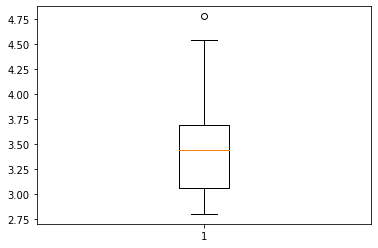

In [218]:
plt.figure()
plt.boxplot(simulated_annealing_results[:, -1])
plt.show()

# 4. $\color{Blue}{
  \text{Evaluation}
}
$

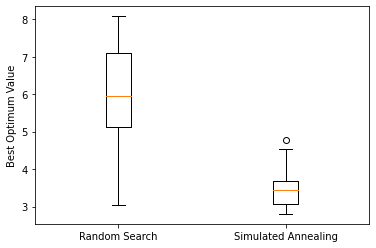

In [219]:
plt.figure()
plt.boxplot([random_search_repeat_results[:, -1], simulated_annealing_results[:, -1]])
plt.xticks([1,2],['Random Search', 'Simulated Annealing'])
plt.ylabel('Best Optimum Value')
plt.show()